## Universidad del Valle de Guatemala
##### Integrantes
* Jose Abraham Gutierrez Corado 19111
* Walter Danilo Saldaña Salguero 19897
* Javier Alejandro Cotto Argueta 19324

### Importar Librerías

In [65]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
sns.set()
from functools import reduce

# Acceso a data del banco mundial
%pip install world_bank_data --upgrade
import world_bank_data as wb

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for world_bank_data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11096 sha256=502cd7405eed2f8b217eaf41195795f36415be2bbf592157d685d19a2a9f8bde
  Stored in directory: /home/walt/.cache/pip/wheels/16/67/47/4f1e6f17c961e04732e33ddb8b2ec7e082c0b5d1029797f381
Successfully built world_bank_data
You should consider upgrading via the '/usr/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Definición de Funciones

In [2]:
def rename_columns(input_data):
    output_data = input_data.rename(
                             columns = {
                                 'Province/State':'subregion',
                                 'Country/Region':'country',
                                 'Lat':'lat',
                                 'Long':'long'
                             })
    return output_data

In [3]:
def melt_data(input_data, value_var_name):
    output_data = input_data.melt(
                             id_vars = ['country', 'subregion', 'lat', 'long'],
                             var_name = 'date_RAW',
                             value_name = value_var_name
                            )
    return output_data

In [4]:
def dates(input_data):
    output_data = input_data.assign(
                             date = pd.to_datetime(input_data.date_RAW, format='%m/%d/%y')
                            )
    output_data.drop(columns = ['date_RAW'], inplace = True)
    return output_data

In [5]:
def ordering_data(input_data, value_var_name):
    output_data = (input_data.filter(['country', 'subregion', 'date', 'lat', 'long', value_var_name])
                  .sort_values(['country', 'subregion', 'date', 'lat', 'long'])
                  .reset_index(drop=True)
                  )
    return output_data

In [6]:
def get_data(input_csv, value_var_name):
    data = pd.read_csv(input_csv)
    data = rename_columns(data)
    data = melt_data(data, value_var_name)
    data = dates(data)
    data = ordering_data(data, value_var_name)
    
    return data
    

In [7]:
covid_positive = get_data("./DATA/time_series_covid19_confirmed_global.CSV", 'CONFIRMED')
covid_deaths =  get_data("./DATA/time_series_covid19_deaths_global.CSV", 'DEATH')
covid_recovered =  get_data("./DATA/time_series_covid19_recovered_global.CSV", 'RECOVERED')

### Muestreo de Datos

In [8]:
covid_positive

,country,subregion,date,lat,long,CONFIRMED
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0
1,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0
2,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0
3,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0
4,Afghanistan,NaN,2020-01-26,33.939110,67.709953,0
...,...,...,...,...,...,...
289284,Zimbabwe,NaN,2022-10-14,-19.015438,29.154857,257827
289285,Zimbabwe,NaN,2022-10-15,-19.015438,29.154857,257827
289286,Zimbabwe,NaN,2022-10-16,-19.015438,29.154857,257893
289287,Zimbabwe,NaN,2022-10-17,-19.015438,29.154857,257893


In [9]:
covid_deaths

,country,subregion,date,lat,long,DEATH
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0
1,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0
2,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0
3,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0
4,Afghanistan,NaN,2020-01-26,33.939110,67.709953,0
...,...,...,...,...,...,...
289284,Zimbabwe,NaN,2022-10-14,-19.015438,29.154857,5605
289285,Zimbabwe,NaN,2022-10-15,-19.015438,29.154857,5605
289286,Zimbabwe,NaN,2022-10-16,-19.015438,29.154857,5606
289287,Zimbabwe,NaN,2022-10-17,-19.015438,29.154857,5606


In [10]:
covid_recovered

,country,subregion,date,lat,long,RECOVERED
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0
1,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0
2,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0
3,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0
4,Afghanistan,NaN,2020-01-26,33.939110,67.709953,0
...,...,...,...,...,...,...
274269,Zimbabwe,NaN,2022-10-14,-19.015438,29.154857,0
274270,Zimbabwe,NaN,2022-10-15,-19.015438,29.154857,0
274271,Zimbabwe,NaN,2022-10-16,-19.015438,29.154857,0
274272,Zimbabwe,NaN,2022-10-17,-19.015438,29.154857,0


Mostraremos los tamaños que se necesitan para poder realizar la unión de los Dataframes

In [11]:
print("Positivos: ", len(covid_positive))
print("Muertes: ", len(covid_deaths))
print("Recuperados: ", len(covid_recovered))

Positivos:  289289
Muertes:  289289
Recuperados:  274274


Vamos a eliminar datos indeceados para poder realizar la unión de los data sets.

In [12]:
covid_deaths.drop(columns = ['lat', 'long'], inplace = True)
covid_recovered.drop(columns = ['lat', 'long'], inplace = True)

### Merge Data

In [13]:
covid_data = (covid_positive
             .merge(covid_deaths, on = ['country', 'subregion', 'date'], how = "left")
             .merge(covid_recovered, on = ['country', 'subregion', 'date'], how = "left")
             )

In [14]:
covid_data

,country,subregion,date,lat,long,CONFIRMED,DEATH,RECOVERED
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0,0,0.0
1,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0,0,0.0
2,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0,0,0.0
3,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0,0,0.0
4,Afghanistan,NaN,2020-01-26,33.939110,67.709953,0,0,0.0
...,...,...,...,...,...,...,...,...
289284,Zimbabwe,NaN,2022-10-14,-19.015438,29.154857,257827,5605,0.0
289285,Zimbabwe,NaN,2022-10-15,-19.015438,29.154857,257827,5605,0.0
289286,Zimbabwe,NaN,2022-10-16,-19.015438,29.154857,257893,5606,0.0
289287,Zimbabwe,NaN,2022-10-17,-19.015438,29.154857,257893,5606,0.0


## Analisis Exploratorio

Muestre de la cabeza de dataset

In [15]:
covid_data.head()

,country,subregion,date,lat,long,CONFIRMED,DEATH,RECOVERED
0,Afghanistan,NaN,2020-01-22,33.93911,67.709953,0,0,0.0
1,Afghanistan,NaN,2020-01-23,33.93911,67.709953,0,0,0.0
2,Afghanistan,NaN,2020-01-24,33.93911,67.709953,0,0,0.0
3,Afghanistan,NaN,2020-01-25,33.93911,67.709953,0,0,0.0
4,Afghanistan,NaN,2020-01-26,33.93911,67.709953,0,0,0.0


Muestreo de la cola del dataset

In [16]:
covid_data.tail()

,country,subregion,date,lat,long,CONFIRMED,DEATH,RECOVERED
289284,Zimbabwe,NaN,2022-10-14,-19.015438,29.154857,257827,5605,0.0
289285,Zimbabwe,NaN,2022-10-15,-19.015438,29.154857,257827,5605,0.0
289286,Zimbabwe,NaN,2022-10-16,-19.015438,29.154857,257893,5606,0.0
289287,Zimbabwe,NaN,2022-10-17,-19.015438,29.154857,257893,5606,0.0
289288,Zimbabwe,NaN,2022-10-18,-19.015438,29.154857,257893,5606,0.0


Muestreo de las columnas del data set

In [17]:
covid_data.columns

Index(['country', 'subregion', 'date', 'lat', 'long', 'CONFIRMED', 'DEATH',
       'RECOVERED'],
      dtype='object')

## Vamos a eliminar duplicados de las columnas Country y Date

In [18]:
pd.set_option('display.max_row', 180)
(covid_data
 .filter(['country'])
 .drop_duplicates()
)

,country
0,Afghanistan
1001,Albania
2002,Algeria
3003,Andorra
4004,Angola
...,...
284284,West Bank and Gaza
285285,Winter Olympics 2022
286286,Yemen
287287,Zambia


In [19]:
(covid_data
     .filter(['date'])
     .drop_duplicates()
     )

,date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
996,2022-10-14
997,2022-10-15
998,2022-10-16
999,2022-10-17


## Vamos a revisar los valores de la columna de Latitud y Longitud y los casos

In [20]:
(covid_data
     .filter(['lat', 'long'])
     .agg(['min', 'max'])
     )

,lat,long
min,-71.9499,-178.1165
max,71.7069,178.0650


In [21]:
(covid_data
     .filter(['CONFIRMED', 'DEATH', 'RECOVERED'])
     .describe()
    )

,CONFIRMED,DEATH,RECOVERED
count,2.892890e+05,2.892890e+05,2.732730e+05
mean,7.735100e+05,1.197861e+04,8.499635e+04
std,4.142184e+06,5.874870e+04,7.524059e+05
min,0.000000e+00,0.000000e+00,-1.000000e+00
25%,4.260000e+02,2.000000e+00,0.000000e+00
50%,1.021000e+04,1.150000e+02,0.000000e+00
75%,1.734780e+05,2.477000e+03,1.625000e+03
max,9.702330e+07,1.065841e+06,3.097475e+07


Revisamos si hay datos negativos y los eliminamos en caso de que si existan

In [22]:
covid_data.query("CONFIRMED < 0 or DEATH < 0 or RECOVERED < 0")

,country,subregion,date,lat,long,CONFIRMED,DEATH,RECOVERED
276240,United Kingdom,Pitcairn Islands,2022-09-13,-24.3768,-128.3242,4,0,-1.0
276241,United Kingdom,Pitcairn Islands,2022-09-14,-24.3768,-128.3242,4,0,-1.0
276242,United Kingdom,Pitcairn Islands,2022-09-15,-24.3768,-128.3242,4,0,-1.0
276243,United Kingdom,Pitcairn Islands,2022-09-16,-24.3768,-128.3242,4,0,-1.0
276244,United Kingdom,Pitcairn Islands,2022-09-17,-24.3768,-128.3242,4,0,-1.0
276245,United Kingdom,Pitcairn Islands,2022-09-18,-24.3768,-128.3242,4,0,-1.0
276246,United Kingdom,Pitcairn Islands,2022-09-19,-24.3768,-128.3242,4,0,-1.0
276247,United Kingdom,Pitcairn Islands,2022-09-20,-24.3768,-128.3242,4,0,-1.0


In [23]:
print(len(covid_data))

289289


In [24]:
covid_data = covid_data.query("not(CONFIRMED < 0 or DEATH < 0 or RECOVERED < 0)")

In [25]:
print(len(covid_data))

289281


In [26]:
(covid_data
     .filter(['CONFIRMED', 'DEATH', 'RECOVERED'])
     .describe()
    )

,CONFIRMED,DEATH,RECOVERED
count,2.892810e+05,2.892810e+05,2.732650e+05
mean,7.735314e+05,1.197894e+04,8.499884e+04
std,4.142239e+06,5.874947e+04,7.524168e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.270000e+02,2.000000e+00,0.000000e+00
50%,1.021000e+04,1.150000e+02,0.000000e+00
75%,1.734910e+05,2.477000e+03,1.625000e+03
max,9.702330e+07,1.065841e+06,3.097475e+07


Contaremos los valores nulos

In [27]:
(covid_data
     .isnull()
     .sum()
    )

country           0
subregion    198198
date              0
lat            2002
long           2002
CONFIRMED         0
DEATH             0
RECOVERED     16016
dtype: int64

Veremos la cantidad de visualizaciones y caracteristicas que tiene el dataset

In [28]:
covid_data.shape

(289281, 8)

In [29]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289281 entries, 0 to 289288
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   country    289281 non-null  object        
 1   subregion  91083 non-null   object        
 2   date       289281 non-null  datetime64[ns]
 3   lat        287279 non-null  float64       
 4   long       287279 non-null  float64       
 5   CONFIRMED  289281 non-null  int64         
 6   DEATH      289281 non-null  int64         
 7   RECOVERED  273265 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 19.9+ MB


## Visualización de Datos

Diagrama de barras

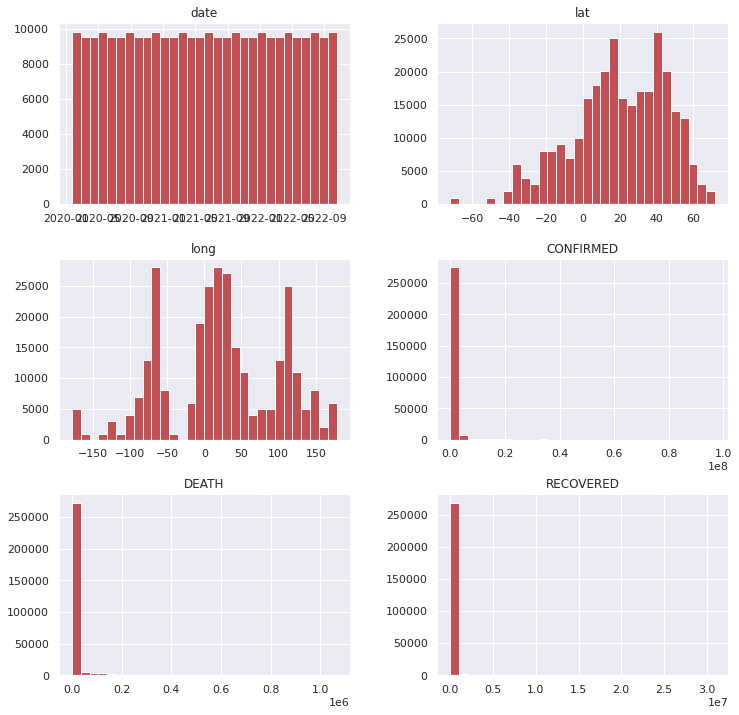

In [30]:
covid_data[['country', 'subregion', 'date', 'lat', 'long', 'CONFIRMED', 'DEATH',
       'RECOVERED']].hist(bins = 30, figsize = (12, 12), color = 'r');

Gráfica de Puntos

In [31]:
# sns.pairplot(covid_data)

## Descripción de Variables

 country - CUALITATIVA: El pais donde pertenece el caso documentado.
 
 date - CUALITATIVA: La fecha que ocurrio el caso.
 
 lat - CUALITATIVA: Latitud
 
 long - CUALITATIVA: Longitud
 
 confirmed - CUALITATIVA: Caso confirmado
 
 death - CUALITATIVA: Caso de muerte
 
 recovered - CUALITATIVA: Caso de recuperación

## 5. Generación de nueva información calculando nuevas columnas

Se obtendrán los valores de nuevos casos infectados, cantidad de fallecidos del día, cantidad de recuperaciones del día, y confirmados del día.
Ordenar el dataset por país y fecha

In [41]:
covid_data = covid_data.sort_values(['country', 'date'])
covid_data

,country,subregion,date,lat,long,CONFIRMED,DEATH,RECOVERED
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0,0,0.0
1,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0,0,0.0
2,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0,0,0.0
3,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0,0,0.0
4,Afghanistan,NaN,2020-01-26,33.939110,67.709953,0,0,0.0
...,...,...,...,...,...,...,...,...
289284,Zimbabwe,NaN,2022-10-14,-19.015438,29.154857,257827,5605,0.0
289285,Zimbabwe,NaN,2022-10-15,-19.015438,29.154857,257827,5605,0.0
289286,Zimbabwe,NaN,2022-10-16,-19.015438,29.154857,257893,5606,0.0
289287,Zimbabwe,NaN,2022-10-17,-19.015438,29.154857,257893,5606,0.0


Obtener delta de valores acumulados respecto al día anterior, si el registro anterior es del mismo país. Este algoritmo es válido dado que previo ordenamos los registros por país y fecha.

In [59]:
covid_data['d_confirmed'] = np.where(
    covid_data['country'] == covid_data['country'].shift(1),
    covid_data['CONFIRMED'] - covid_data['CONFIRMED'].shift(1),
    0
)
covid_data['d_death'] = np.where(
    covid_data['country'] == covid_data['country'].shift(1),
    covid_data['DEATH'] - covid_data['DEATH'].shift(1),
    0
)
covid_data['d_recovered'] = np.where(
    covid_data['country'] == covid_data['country'].shift(1),
    covid_data['RECOVERED'] - covid_data['RECOVERED'].shift(1),
    0
)

In [63]:
covid_data

,country,subregion,date,lat,long,CONFIRMED,DEATH,RECOVERED,d_confirmed,d_death,d_recovered
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0
1,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0
2,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0
3,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0
4,Afghanistan,NaN,2020-01-26,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
289284,Zimbabwe,NaN,2022-10-14,-19.015438,29.154857,257827,5605,0.0,0.0,0.0,0.0
289285,Zimbabwe,NaN,2022-10-15,-19.015438,29.154857,257827,5605,0.0,0.0,0.0,0.0
289286,Zimbabwe,NaN,2022-10-16,-19.015438,29.154857,257893,5606,0.0,66.0,1.0,0.0
289287,Zimbabwe,NaN,2022-10-17,-19.015438,29.154857,257893,5606,0.0,0.0,0.0,0.0


Los casos nuevos por día se obtienen con el delta de confirmados más fallecidos, más recuperados. Se adicionan estos campos debido a que por ejemplo, si fallece una persona al mismo día que una nueva persona es confirmada, se resta uno de confirmado y se agrega otro a confirmado, dando un delta de 0, pero al sumarle el fallecido (+1) obtenemos el valor de los nuevos casos.

In [64]:
covid_data['new_confirmed'] = covid_data['d_confirmed'] + covid_data['d_death'] + covid_data['d_recovered']
covid_data

,country,subregion,date,lat,long,CONFIRMED,DEATH,RECOVERED,d_confirmed,d_death,d_recovered,new_confirmed
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,NaN,2020-01-26,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289284,Zimbabwe,NaN,2022-10-14,-19.015438,29.154857,257827,5605,0.0,0.0,0.0,0.0,0.0
289285,Zimbabwe,NaN,2022-10-15,-19.015438,29.154857,257827,5605,0.0,0.0,0.0,0.0,0.0
289286,Zimbabwe,NaN,2022-10-16,-19.015438,29.154857,257893,5606,0.0,66.0,1.0,0.0,67.0
289287,Zimbabwe,NaN,2022-10-17,-19.015438,29.154857,257893,5606,0.0,0.0,0.0,0.0,0.0


Los valores de cuantas muertes hubo en el día está dado por `d_death`. Los valores de cuantas recuperaciones hubo en el día está dado por `d_recovered`. 

## 6. Normalización de los datos re-calculando todo en base de “por millón de habitantes"
Obtener la población de cada país con datos del banco mundial.

In [79]:
population = wb.get_series('SP.POP.TOTL', id_or_value='id', simplify_index=True, mrv=1)
countries = wb.get_countries()
country_population = countries[['name']].rename(columns={'name': 'country'}).loc[countries.region != 'Aggregates']
country_population['population'] = population
country_population

,country,population
id,,
ABW,Aruba,107195.0
AFG,Afghanistan,39835428.0
AGO,Angola,33933611.0
ALB,Albania,2811666.0
AND,Andorra,77354.0
...,...,...
XKX,Kosovo,1806279.0
YEM,"Yemen, Rep.",30490639.0
ZAF,South Africa,60041996.0


In [89]:
population_dict = dict(zip(country_population.country, country_population.population))
population_dict

{'Aruba': 107195.0,
 'Afghanistan': 39835428.0,
 'Angola': 33933611.0,
 'Albania': 2811666.0,
 'Andorra': 77354.0,
 'United Arab Emirates': 9991083.0,
 'Argentina': 45808747.0,
 'Armenia': 2968128.0,
 'American Samoa': 55103.0,
 'Antigua and Barbuda': 98728.0,
 'Australia': 25739256.0,
 'Austria': 8956279.0,
 'Azerbaijan': 10145212.0,
 'Burundi': 12255429.0,
 'Belgium': 11587882.0,
 'Benin': 12451031.0,
 'Burkina Faso': 21497097.0,
 'Bangladesh': 166303494.0,
 'Bulgaria': 6899125.0,
 'Bahrain': 1748295.0,
 'Bahamas, The': 396914.0,
 'Bosnia and Herzegovina': 3263459.0,
 'Belarus': 9340314.0,
 'Belize': 404915.0,
 'Bermuda': 63867.0,
 'Bolivia': 11832936.0,
 'Brazil': 213993441.0,
 'Barbados': 287708.0,
 'Brunei Darussalam': 441532.0,
 'Bhutan': 779900.0,
 'Botswana': 2397240.0,
 'Central African Republic': 4919987.0,
 'Canada': 38246108.0,
 'Switzerland': 8697723.0,
 'Channel Islands': 175244.0,
 'Chile': 19212362.0,
 'China': 1412360000.0,
 "Cote d'Ivoire": 27053629.0,
 'Cameroon': 27

In [94]:
covid_data['country'].map(population_dict)

0         39835428.0
1         39835428.0
2         39835428.0
3         39835428.0
4         39835428.0
             ...    
289284    15092171.0
289285    15092171.0
289286    15092171.0
289287    15092171.0
289288    15092171.0
Name: country, Length: 289281, dtype: float64

Normalizar datos por millon de habitantes

In [100]:
covid_data['CONFIRMED_PM'] = (
    (covid_data['CONFIRMED'] / covid_data['country'].map(population_dict)) * 1000000)

covid_data['DEATH_PM'] = (
    (covid_data['DEATH'] / covid_data['country'].map(population_dict)) * 1000000)

covid_data['RECOVERED_PM'] = (
    (covid_data['RECOVERED'] / covid_data['country'].map(population_dict)) * 1000000)

covid_data['d_confirmed_pm'] = (
    (covid_data['d_confirmed'] / covid_data['country'].map(population_dict)) * 1000000)

covid_data['d_death_pm'] = (
    (covid_data['d_death'] / covid_data['country'].map(population_dict)) * 1000000)

covid_data['d_recovered_pm'] = (
    (covid_data['d_recovered'] / covid_data['country'].map(population_dict)) * 1000000)

covid_data['new_confirmed_pm'] = (
    (covid_data['new_confirmed'] / covid_data['country'].map(population_dict)) * 1000000)

covid_data

,country,subregion,date,lat,long,CONFIRMED,DEATH,RECOVERED,d_confirmed,d_death,d_recovered,new_confirmed,CONFIRMED_PM,DEATH_PM,RECOVERED_PM,d_confirmed_pm,d_death_pm,d_recovered_pm,new_confirmed_pm
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
1,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
2,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
3,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
4,Afghanistan,NaN,2020-01-26,33.939110,67.709953,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289284,Zimbabwe,NaN,2022-10-14,-19.015438,29.154857,257827,5605,0.0,0.0,0.0,0.0,0.0,17083.493157,371.384607,0.0,0.000000,0.00000,0.0,0.000000
289285,Zimbabwe,NaN,2022-10-15,-19.015438,29.154857,257827,5605,0.0,0.0,0.0,0.0,0.0,17083.493157,371.384607,0.0,0.000000,0.00000,0.0,0.000000
289286,Zimbabwe,NaN,2022-10-16,-19.015438,29.154857,257893,5606,0.0,66.0,1.0,0.0,67.0,17087.866285,371.450867,0.0,4.373128,0.06626,0.0,4.439388
289287,Zimbabwe,NaN,2022-10-17,-19.015438,29.154857,257893,5606,0.0,0.0,0.0,0.0,0.0,17087.866285,371.450867,0.0,0.000000,0.00000,0.0,0.000000
